In [1]:
import plotly.graph_objs as go
from PIL import Image
import imageio
import numpy as np
import base64
import io
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from ipywidgets import interact, IntSlider
from skimage import io, filters, measure
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import Slider
import matplotlib.animation as animation
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
from scipy.stats import pearsonr

%matplotlib inline

## Hi Noga, please make sure the .tiff files are stored in a subfolder called data in the root directory of the project!

# Problem 1

## Problem 1A

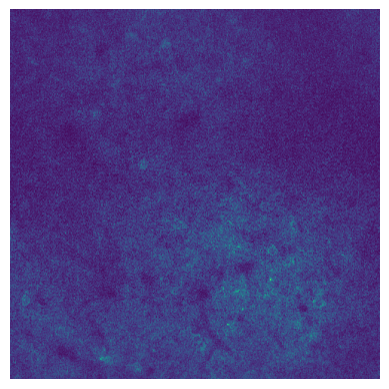

In [3]:
from spandia1_exerciseA_problem1 import * 

main()

## Problem 1B

Selected frames number 204 and 209


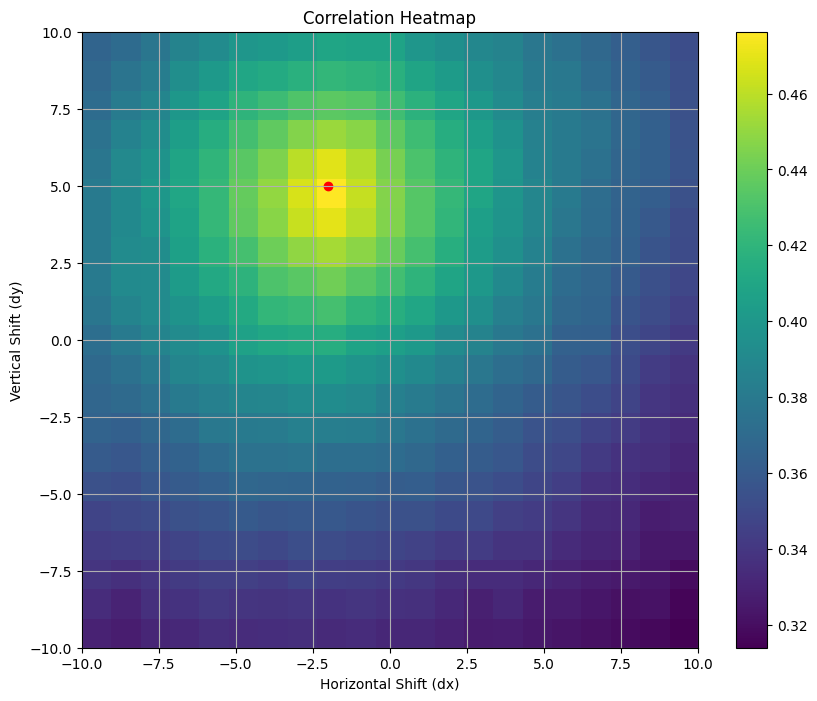

Maximum correlation at (dx, dy): (-2, 5) with correlation coefficient of 0.4762794105925902


In [4]:
from spandia1_exerciseB_problem1 import * 

main()

The correlation peak between frame n = 204 and frame n = 209 occurs when the latter is shifted -2 in the x direction and +5 in the y direction

# PROBLEM 2

## Problem 2A

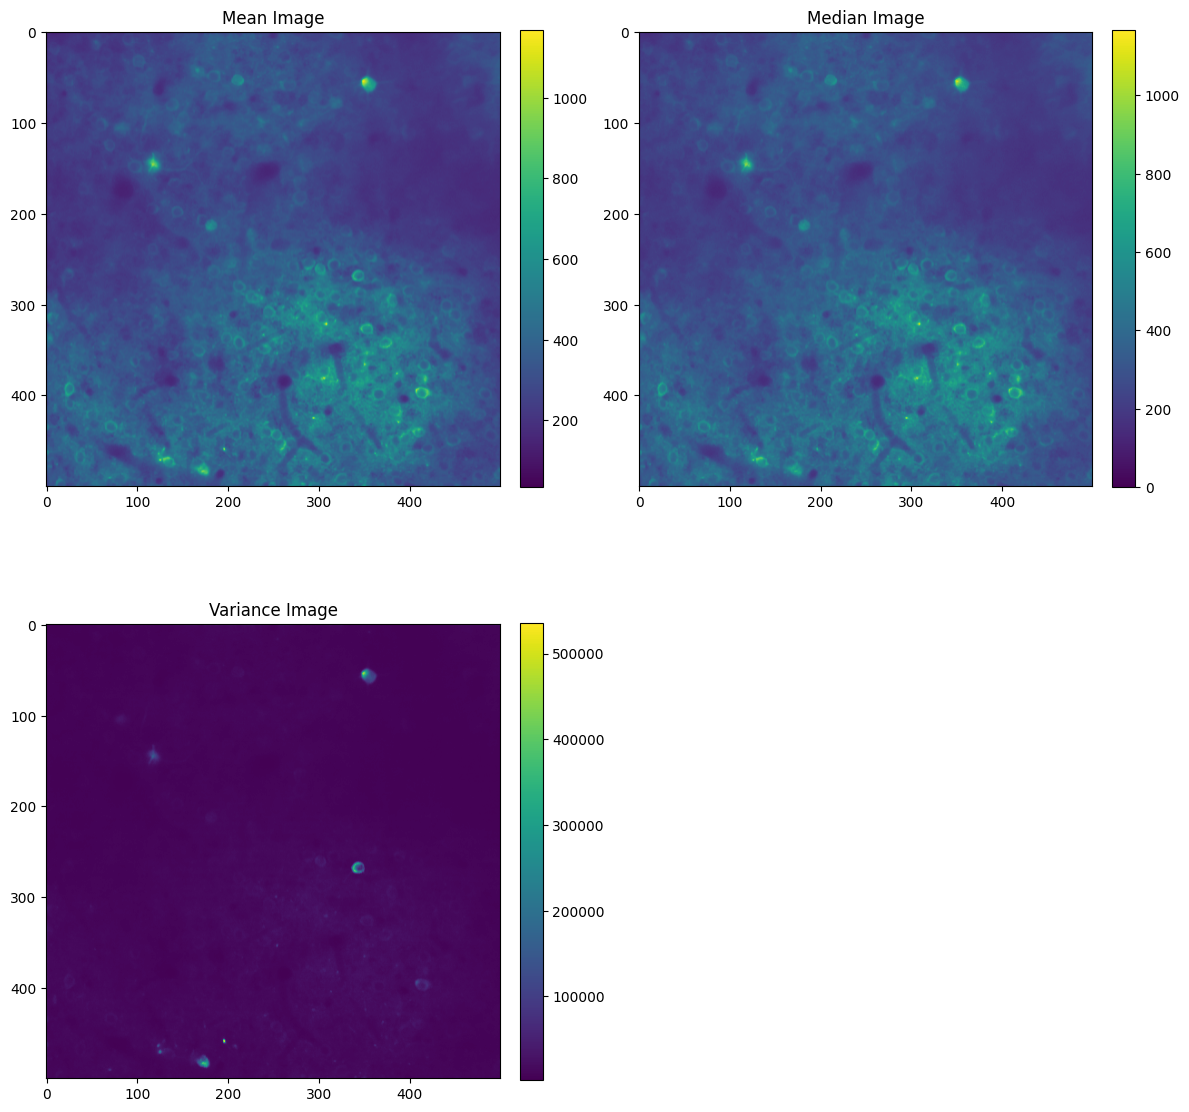

In [5]:
from spandia1_exerciseA_problem2 import * 

main()

They seem most visible in the variance image whereas in the mean and median image, they appear somewhat befuddled by noise (kind of like fluorescent "pollution"). In addition in terms of consistency of cell visibility across the images, the cells that are bright in both the mean and median images but not in the variance image are likely consistently active. On the other hand, cells bright in the variance image likely have fluctuating activity.

The ROIs of the variance image are likely the most relevant as they are the regions that this session of Ca2+ imaging were most sensitive to. They are also partially identifiable in the other images

## Problem 2B

I think that a maximum image (where the maximum for across every pixel is considered) could be useful in finding areas that were consistently most active. In addition, a similar one where the mean is subtracted from the maximum could be a good way to remove "baseline-activity".

A coefficient of variation image (ratio of st dev:mean for each pixel) would also be interesting. This would highlight regions with high relative variability, regardless of the absolute intensity which my otherwise overemphasize certain ROIs.

Another image is a neighbor-correlation image where for each pixel, the average of the correlation with its cardinal/direct neigbors is computed, which could help eliminated noise.

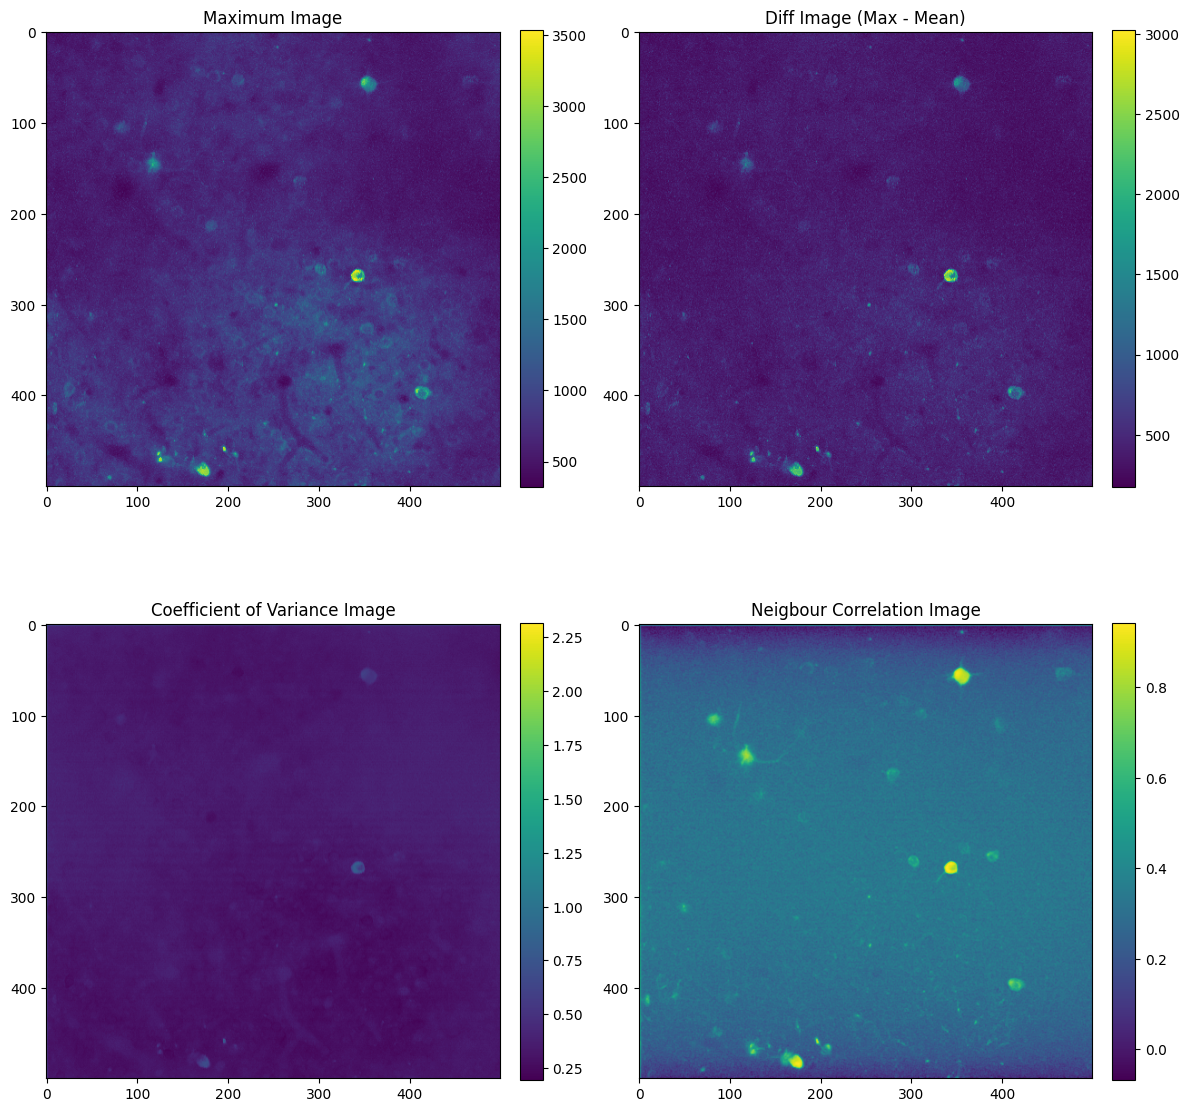

In [6]:
# Neigbourhood Correlation Image has been saved as a separate file and preloaded as it would otherwise take ~20 mins to create
from spandia1_exerciseB_problem2 import * 

main()

Each of these images have some regions common between one another and with the images from 2A, especially variance.

Comparing the Maximum Image with the Diff Image (Max - Mean), the latter looks cleaner which is to be expected as it removes background activity.

The Correlation of Variance Image, which examines standard deviation of each pixel relative to the mean, yields what appears to be a theresholded version of the Maximum and Diff Images as some ROIs remain while below some threshold become muted.

Finally, the Neighbour Correlation Image seems interesting as it seemingly exaggerates certain ROIs where it was able to identify potential clusters of neurons.

What could be interesting as a next step is to use successive layers of masks to identify ROIs with particular properties based on the masks used, such as a mask to find pixels that have a high maximum fluorescience, are high-variance, and have high correlation with neighbouring pixels.

# Problem 3

## Problem 3A

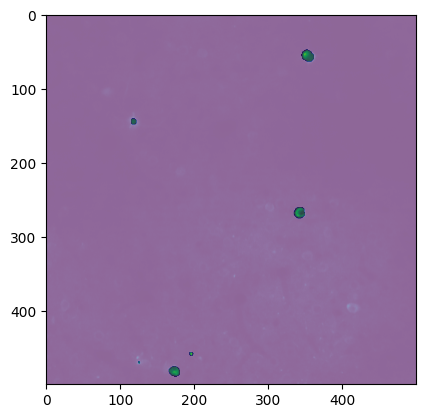

Region label 1: Centroid at (x=353.128078817734, y=55.94088669950739)
Region label 2: Centroid at (x=117.9, y=144.62)
Region label 3: Centroid at (x=342.13483146067415, y=267.9269662921348)
Region label 4: Centroid at (x=195.8095238095238, y=458.85714285714283)
Region label 5: Centroid at (x=125.4, y=470.2)
Region label 6: Centroid at (x=173.28395061728395, y=482.45061728395063)


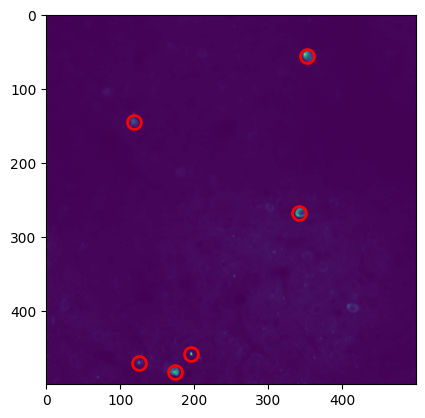

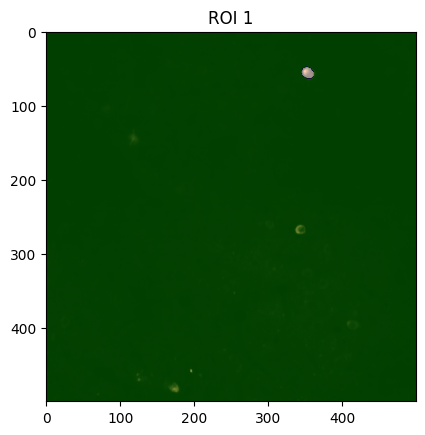

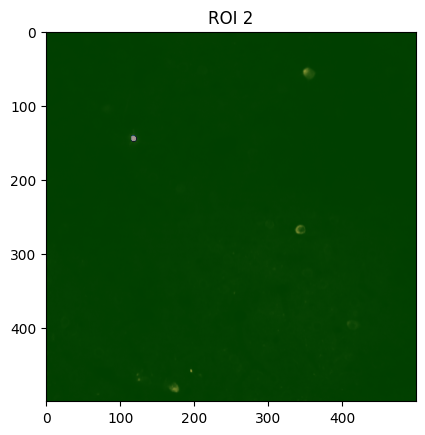

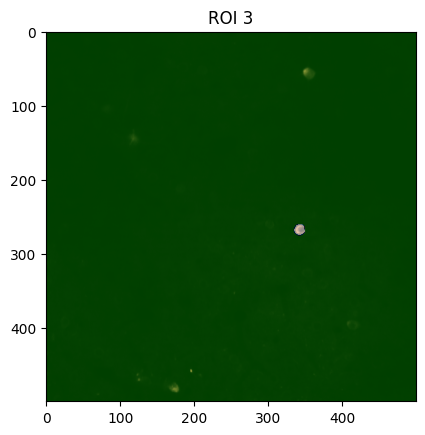

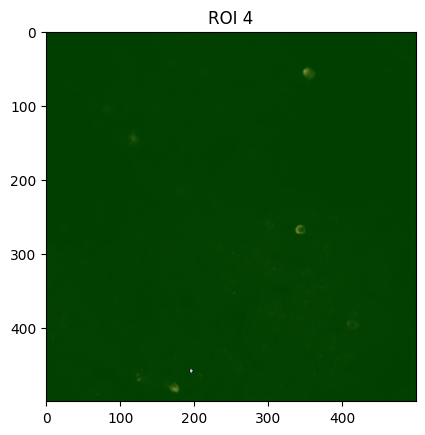

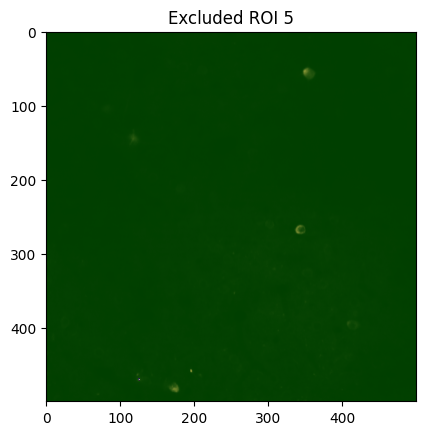

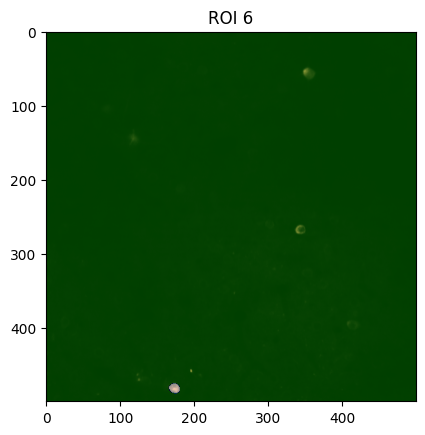

In [7]:
from spandia1_exerciseA_problem3 import * 

main()

Of the above ROIs, #1, 2, 3, 4, and 6 were used

## Problem 3B

Some ways the ROIs can be validated is by looking at fluorescence tracings of each of them and comparing them visually with video. It might also be interesting to compare the fluorescence intensity distributions within the ROIs to distributions of regions outside the ROIs (non-ROIs). In this case, good ROIs would capture cells' signals, which could very likely have a different distribution than the background non-ROIs. Another method could be to examine the correlation of fluorescence of pixels over time within the same ROI as I have already done in the correlation with neighbors summary image!

# Problem 4

## Problem 4A

My approach was for each of the ROIs identified and extracted in Problem 3, I selected all pixels that lie within a given ROI mask and extracted both the average (mean or median) and maximum fluorescence for those group of pixels over time (ie for each frame)

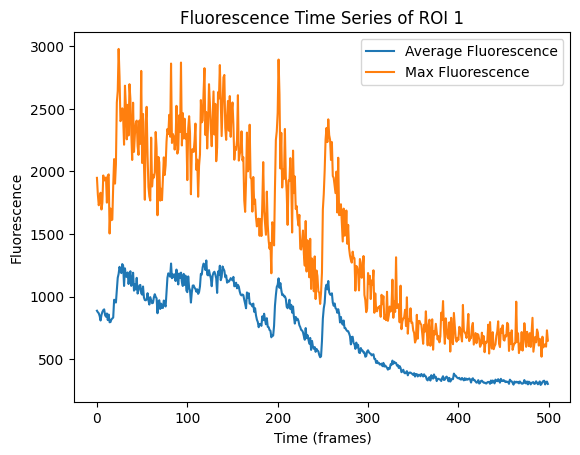

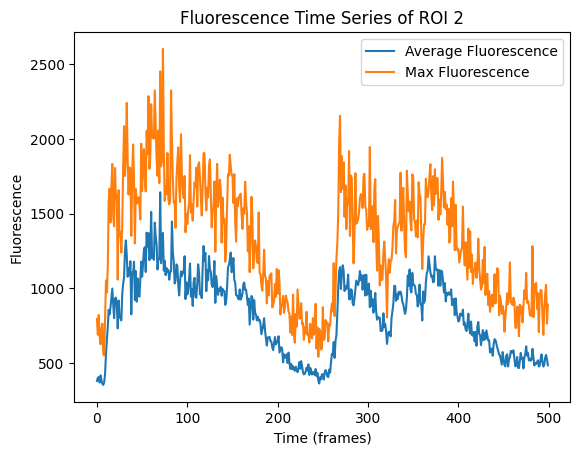

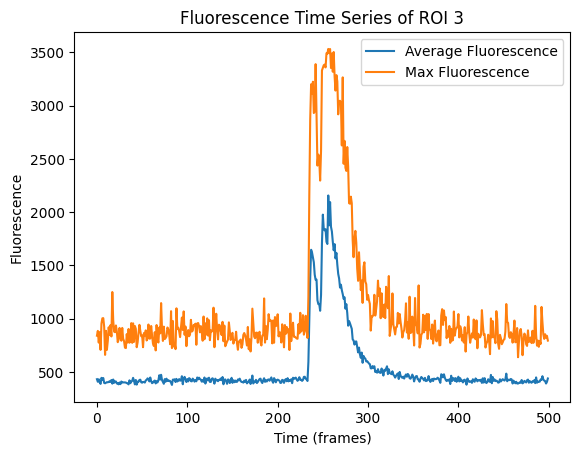

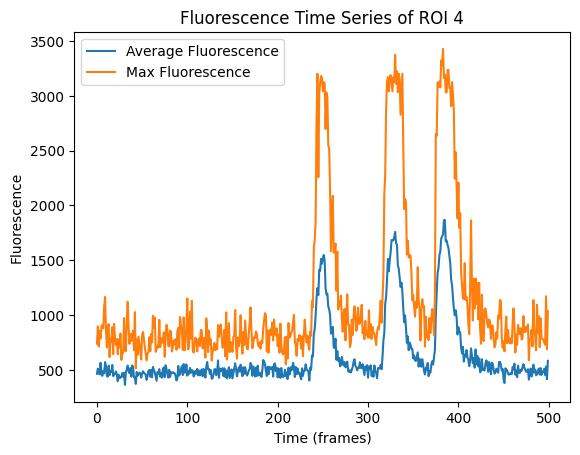

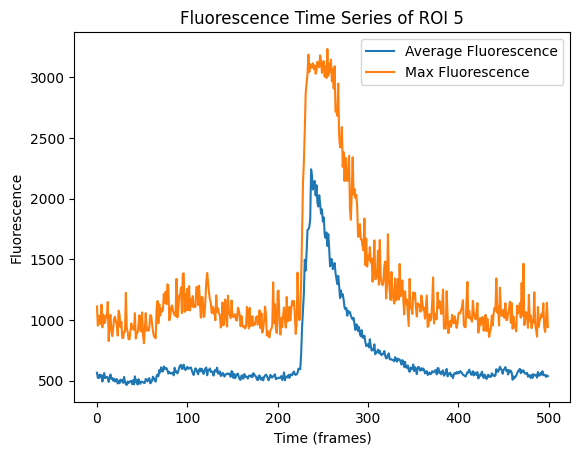

In [8]:
from spandia1_exerciseA_problem4 import * 
# Average represents mean
main()

## Problem 4B

Based on visual inspection, I believe both of the fluorescent traces (maximum and average) do accurately reflect activity in each ROI. Other ways to test accuracy could be to correlate the timetrace with fluorescence of individual traces, compare the traces with some ground truth signal (perhaps if there was an external input to these neurons of some sort), or the variance of fluorescence of the pixels within an ROI, which is done here:

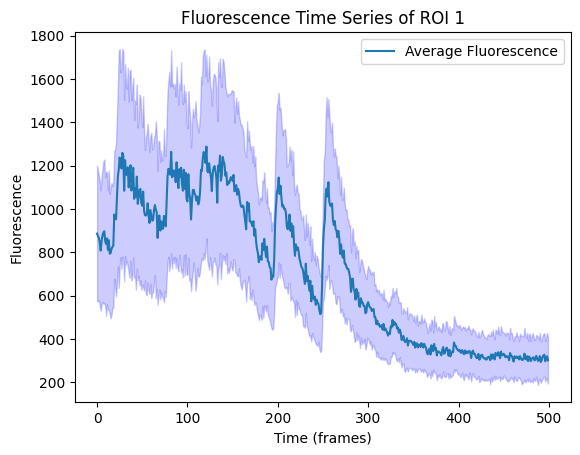

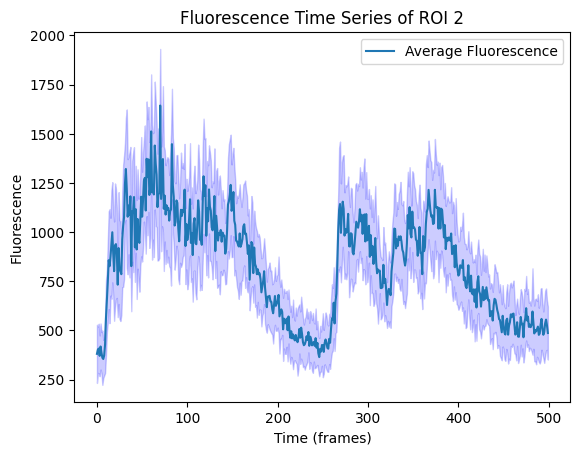

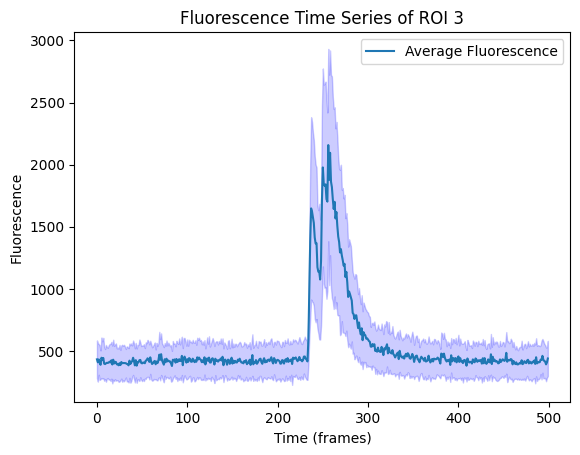

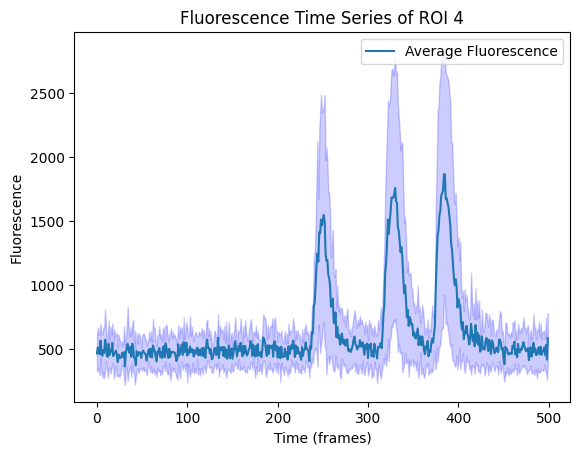

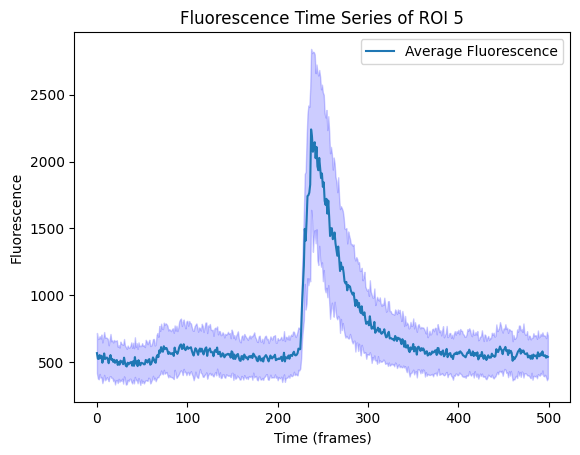

In [9]:
from spandia1_exerciseB_problem4 import * 
# You will need ffmpeg

main()

The standard deviation of this ROI's time trace seems relatively high compared to the mean. However, it is very possible that these pixels differ in magnitude but can all be highly correlated, which is not information captured this way. What this plot tells us is that the pixels in a given ROI may vary quite a bit in magnitude.

# Problem 5

## Problem 5A

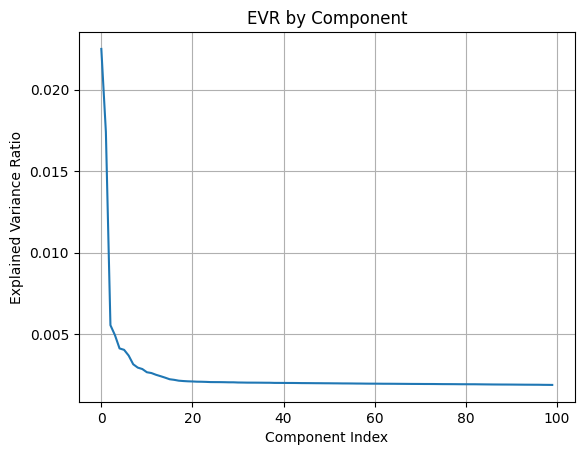

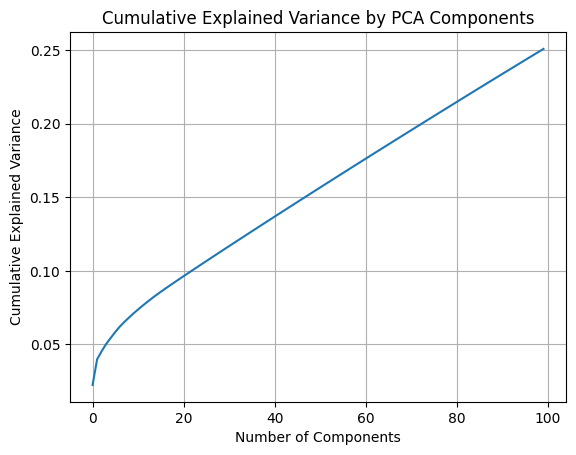

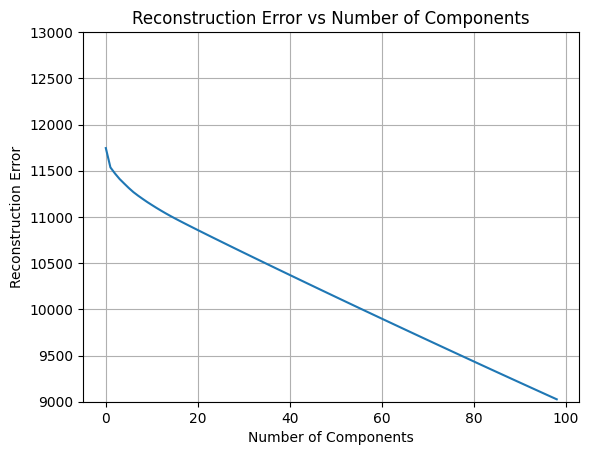

In [10]:
from spandia1_exerciseA_problem5 import * 
# You will need ffmpeg

main()

Based on the first plot: The EVR of each components rapidly decreases until about 15-16 components (elbow) after which each component has a very similar and relatively small EVR

Based on the second plot: As additional components are added, the cumulative explained variance increase, which is to be expected as each component is responsible for some amount of variance. However, after the first 15-16 components, the marginal increase in explained variance with additional PCA components decreases and becomes linear which makes sense given the EVR vs Components plot

## Problem 5B

C:\Users\surya\anaconda3\envs\nsc\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\surya\anaconda3\envs\nsc\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\surya\anaconda3\envs\nsc\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\surya\anaconda3\envs\nsc\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\surya\anaconda3\envs\nsc\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  

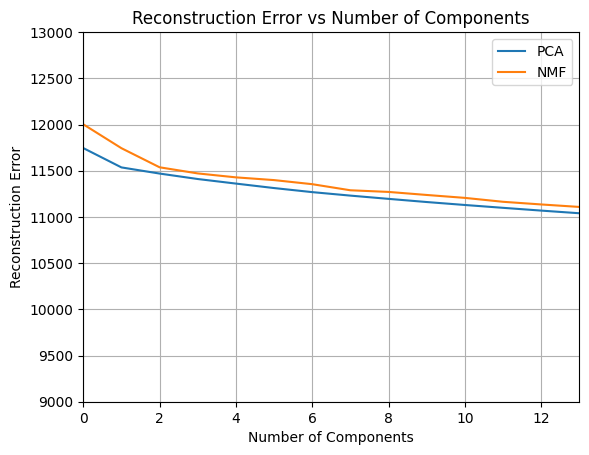

In [11]:
# WARNING: THIS CELL TAKES A VERY LONG TIME TO RUN
# IT IS PROBABLY IN YOUR BEST INTEREST TO LOOK AT THE DEFAULT NOTEBOOK OUTPUTS INSTEAD OF RERUNNING
# -Surya

from spandia1_exerciseB_problem5 import * 

main()

Like PCA, the reconstruction error decreases given a higher rank/number of components. However, unlike PCA, when visualizing the components PCA components do not change as the n_components used increases while NMF does change (ie the first component with n_components = 5 is different than n_components = 10). Each component in NMF can potentially "take over" part of the role of earlier components depending on how the overall error minimization progresses as more components are added.

On the other hand, with PCA, each component is strictly orthogonal to the others and defined in a globally optimal way independently of the number of components extracted.

Only 1-15 components were used for NMF as it is computationally expensive. Compared to PCA with the same number of components, in terms of performance, both are comparable though PCA does slightly better.

## Problem 5C

<Figure size 640x480 with 0 Axes>

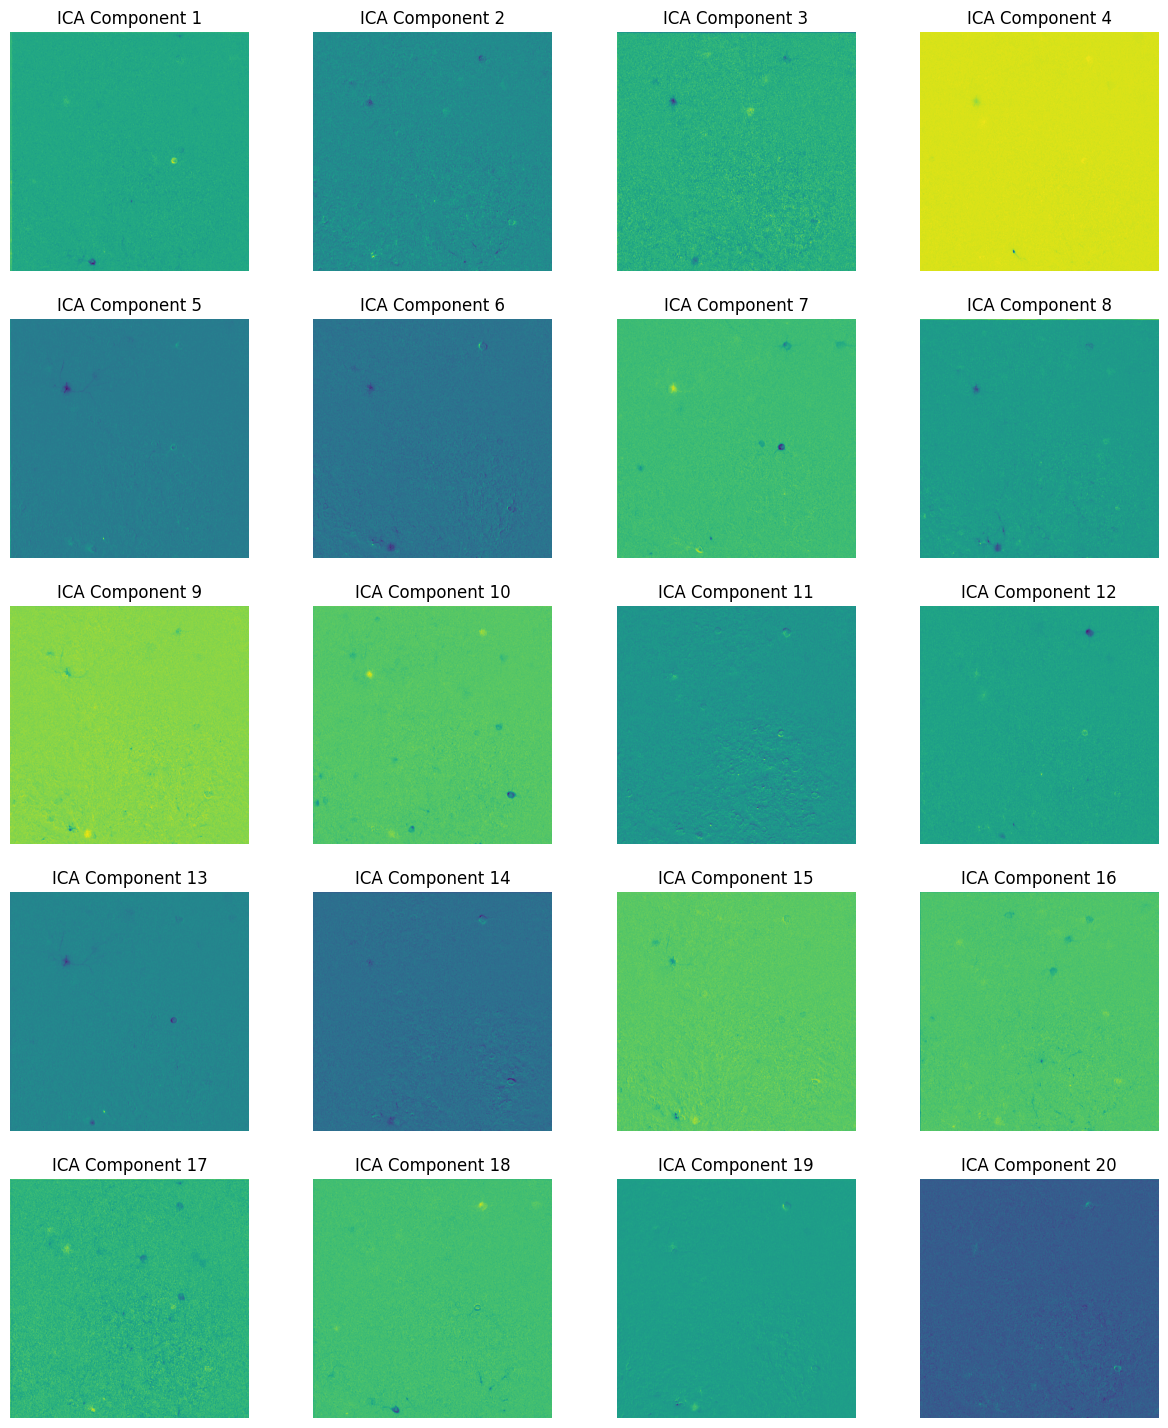

In [12]:
from spandia1_exerciseC_problem5 import * 
# You will need ffmpeg

main()

Rather than identifying components that orthogonalize and maximize variance, ICA aims to find components that maximize statistical independence. Therefore, components are not ranked in terms of their explained variance. Ideally, across all components, there would be some that exclusively contained a single ROI but given there seems to be quite a bit of co-activation, this is not evident in the above ICA components. However, by merging and tinkering with some components, it is very likely possible to remove background firing and create convincing global ROI masks.